In [2]:
#Import LIBRARIES

import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from datetime import datetime

#Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data clean up

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [140]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [141]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()


def projected_salary(salary):
    return salary * 1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [142]:
df_salary['salary_year_inflated']= df_salary['salary_year_avg'].apply(lambda salary: salary *1.03) 

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [143]:

import ast


print(type(df['job_skills']))



<class 'pandas.core.series.Series'>


In [144]:
type(df['job_skills'][1])


str

In [145]:


type(ast.literal_eval(df['job_skills'][1]))


list

In [146]:
df['job_skills'][1]

"['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']"

In [147]:
df['job_skills'] =  df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list)if pd.notna(skill_list) else skill_list)

In [148]:
df_salary['salary_year_inflated']= df_salary['salary_year_avg'].apply(lambda salary: salary *1.03) 

df_salary[['salary_year_avg', 'salary_year_inflated']]

,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [149]:
def  projected_salary(row):
    if 'Senior' in row['job_title_short']:
        return 1.05* row['salary_year_avg']
    else:
        return 1.03* row['salary_year_avg']

df_salary['salary_year_inflated']  = df_salary.apply(projected_salary, axis=1)


df_salary[['job_title_short','salary_year_avg', 'salary_year_inflated']]

,job_title_short,salary_year_avg,salary_year_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


In [150]:
df_test  = df.copy()

df_test['job_posted_date_str'] = df_test['job_posted_date'].apply(lambda to_string: to_string.strftime('%Y-%m-%d'))

df_test[['job_posted_date', 'job_posted_date_str']].head()


,job_posted_date,job_posted_date_str
0,2023-06-16 13:44:15,2023-06-16
1,2023-01-14 13:18:07,2023-01-14
2,2023-10-10 13:14:55,2023-10-10
3,2023-07-04 13:01:41,2023-07-04
4,2023-08-07 14:29:36,2023-08-07


In [157]:
import datetime

df_test['days_since_posted'] = df_test['job_posted_date'].apply(lambda x: (datetime.datetime.now() - x).days)

df_test[['job_posted_date','days_since_posted']]

,job_posted_date,days_since_posted
0,2023-06-16 13:44:15,468
1,2023-01-14 13:18:07,621
2,2023-10-10 13:14:55,352
3,2023-07-04 13:01:41,450
4,2023-08-07 14:29:36,416
...,...,...
785736,2023-03-13 06:16:16,564
785737,2023-03-12 06:18:18,565
785738,2023-03-12 06:32:36,565
785739,2023-03-12 06:32:15,565


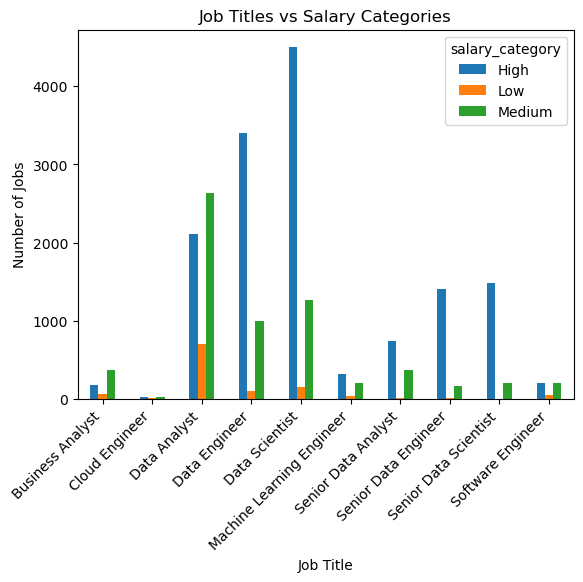

In [9]:
df_filtered = df[pd.notna(df['salary_year_avg'])].copy()

df_filtered['salary_category'] = df_filtered['salary_year_avg'].apply(lambda salary : 'Low' if salary < 60000 else 'Medium' if  60000 <= salary < 100000 else 'High')



#df_filtered.groupby('job_title_short')['salary_category'].value_counts().plot(kind='bar')

df_filtered.groupby(['job_title_short','salary_category']).size().unstack().plot(kind='bar', stacked=False)

# Añadir etiquetas y título
plt.title('Job Titles vs Salary Categories')
plt.xlabel('Job Title')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()